# Imports and settings

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import norm


#import tensorflow as tf
#from tensorflow import keras  # tf.keras

#set seed for reproducibility of results
np.random.seed(42) 
#tf.random.set_seed(42)



In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
import sys
sys.version

'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

In [4]:
import sklearn
sklearn.__version__

'0.23.2'

## Display settings

In [5]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Import data

In [6]:
mela = pd.read_excel('Melanoma1517_aggiornato_12042022_sub.xlsx') 

In [7]:
mela

,ID_N,sesso,eta_diagn,dinciden,ALTRA_INCIDENZA,anno,Nuove_Ulss_res,stato_civile,stato_civile_2,istruzione,istruzione_2,morfologia,breslow_new,ISTOGENETICA,STADIOT_VER8,STADION_VER8,STADIOM_VER8,STADIOTNM8_tot,mitosi,ulcerazione,regressione,tipo_crescita,sede_2,til_2,bls_linfo_positivi,bls_diametro_massimo_metastasi_m,la_linfo_positivi,STATO_311220,Causa_311220,Sopravvivenza_311220,COSTO_MELA_sdo_Y1,COSTO_MELA_sdo_Y2,COSTO_MELA_cinecaY1,COSTO_MELA_cinecaY2,COSTO_MELA_IFN_f3_Y1,COSTO_MELA_IFN_f3_Y2,COSTO_MELA_ALTOCOSTO_f3_Y1,COSTO_MELA_ALTOCOSTO_f3_Y2,COSTO_MELA_CHEMIOTERAPIA_f3_Y1,COSTO_MELA_CHEMIOTERAPIA_f3_Y2,COSTO_MELA_app_spsY1,COSTO_MELA_app_spsY2,COSTO_COMPLESSIVO_MELA_Y1,COSTO_COMPLESSIVO_MELA_Y2,til,DECESSO,DECESSO_2_anni,Sopravvivenza_2_anni,DECESSO_3_anni,Sopravvivenza_3_anni,DECESSO_Y1,etaCL,morfologia_2,mitosi_3,COSTO_COMPLESSIVO_MELA,COSTO_SDO_MELA,COSTO_SPS_MELA,COSTO_F3_MELA,COSTO_CINECA_MELA
0,M101000951,F,31,2015-02-20,NO,2015,6 Euganea,2.0,Coniugato/a,5.0,Laurea o superiore,87713.0,G-F044,2,pT4b,N3c,M0,III,3.0,Presente,Assente,Verticale,Tronco,Assente,NaN,NaN,3.0,VIVO,NaN,648,1729.66,11172.09,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,3781.00,4914.95,5510.66,16087.04,Assente,0,0,648,0,648,0,<40,Cellule Epitelioidi,2+,21597.70,12901.75,8695.95,0.00,0.0
1,M101001645,M,53,2017-11-10,NaN,2017,1 Dolomiti,NaN,NaN,NaN,NaN,87703.0,G-F041,1,pT1a,N0,M0,I,0.0,Assente,Presente,Verticale,Tronco,Presente,NaN,NaN,NaN,VIVO,NaN,1147,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,233.15,66.90,233.15,66.90,Presente,0,0,730,0,1095,0,50-59,Altro,0-2,300.05,0.00,300.05,0.00,0.0
2,M101001889,F,67,2015-09-01,NO,2015,5 Polesana,6.0,Non dichiarato,3.0,Diploma di scuola media superiore,87433.0,G-F042,1,pT1b,N0,M0,I,0.0,Assente,Assente,Verticale,Arti superiori,Presente,NaN,NaN,NaN,VIVO,NaN,1948,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,336.65,77.30,336.65,77.30,Presente,0,0,730,0,1095,0,60-69,Diffusione Superficiale,0-2,413.95,0.00,413.95,0.00,0.0
3,M101002549,F,29,2015-01-22,NO,2015,5 Polesana,6.0,Non dichiarato,0.0,Nessun titolo,87713.0,G-F041,1,pT1a,N1a,M0,III,0.0,Assente,Assente,Verticale,Tronco,Presente,1.0,0.22,0.0,VIVO,NaN,2170,5747.67,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,613.70,1187.75,6361.37,1187.75,Presente,0,0,730,0,1095,0,<40,Cellule Epitelioidi,0-2,7549.12,5747.67,1801.45,0.00,0.0
4,M101003351,F,57,2015-08-20,NO,2015,5 Polesana,NaN,NaN,NaN,NaN,87713.0,G-F041,1,pT1a,N0,M0,I,0.0,Assente,Assente,Orizzontale,Arti inferiori,Presente,NaN,NaN,NaN,VIVO,NaN,1960,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,35.80,6.80,35.80,6.80,Presente,0,0,730,0,1095,0,50-59,Cellule Epitelioidi,0-2,42.60,0.00,42.60,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,M605786587,F,95,2017-02-14,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87203.0,G-F044,2,pT4b,N0,M0,II,8.0,Presente,DM,Verticale,Arti inferiori,DM,NaN,NaN,NaN,DECEDUTO,Altro,18,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,0.00,DM,1,1,18,1,18,1,80+,NAS,2+,0.00,0.00,NaN,0.00,0.0
2643,M606975203,M,43,2017-02-16,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87433.0,G-F041,1,pT1a,N2a,M0,III,2.0,Assente,Assente,Verticale,Arti superiori,Assente,2.0,0.08,0.0,VIVO,NaN,1414,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1534.15,1108.60,1534.15,1108.60,Assente,0,0,730,0,1095,0,40-49,Diffusione Superficiale,0-2,2642.75,0.00,2642.75,0.00,0.0
2644,M607314943,M,68,2017-01-18,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,NaN,DM,0,pT0,NaN,M1,IV,NaN,DM,DM,DM,DM,DM,NaN,NaN,NaN,VIVO,NaN,1443,0.00,0.00,0.0,0.0,0.0,0.0,46706.27,0.00,0.0,0.0,6879.55,3415.40,53585.82,3415.40,DM,0,0,730,0,1095,0,60-69,DM,DM,57001.22,0.00,10294.95,46706.27,0.0
2645,M608281943,F,67,2017-03-31,NaN,2017,6 Euganea,NaN,NaN,NaN,NaN,87203.0,DM,0,NaN,N1c,M1,IV,NaN,DM,DM,DM,Arti inferiori,DM,NaN,NaN,NaN,VIVO,NaN,1371,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,6847.25,11

In [8]:
mela.shape

(2647, 59)

# Data preprocessing

## Inspect data

In [9]:
for c in mela.columns:
    print('\n-----{}-----'.format(c))
    print(mela[c].value_counts())
    print('Missin values ', np.sum(mela[c].isna()))


-----ID_N-----
M102953931    1
M107128254    1
M303923122    1
M405947492    1
M402549996    1
             ..
M101579920    1
M103665844    1
M105261032    1
M107965175    1
M406324178    1
Name: ID_N, Length: 2647, dtype: int64
Missin values  0

-----sesso-----
M    1404
F    1243
Name: sesso, dtype: int64
Missin values  0

-----eta_diagn-----
70     64
75     62
60     61
67     59
77     59
53     59
57     59
58     59
48     59
49     58
44     58
62     55
46     55
50     53
74     52
72     52
54     52
41     51
61     50
63     50
69     49
47     49
56     48
55     48
68     48
43     48
64     48
78     47
80     47
76     47
59     47
52     46
42     46
71     46
65     45
73     44
51     44
66     41
45     41
39     39
40     37
79     36
81     35
83     35
38     30
82     30
36     29
85     29
84     28
86     26
37     23
35     22
87     21
34     18
90     17
33     16
88     16
30     14
28     13
91     12
29     11
31     11
32     10
89     10
92      9
2

In [10]:
print(np.mean(mela['eta_diagn']))
print(np.median(mela['eta_diagn']))
print(np.min(mela['eta_diagn']))
print(np.max(mela['eta_diagn']))

59.736305251227805
60.0
15
101


In [11]:
print(np.mean(mela['Sopravvivenza_3_anni']))
print(np.median(mela['Sopravvivenza_3_anni']))
print(np.min(mela['Sopravvivenza_3_anni']))
print(np.max(mela['Sopravvivenza_3_anni']))

1032.884397431054
1095.0
0
1095


In [12]:
print(np.nanmean(mela['mitosi']))
print(np.nanmedian(mela['mitosi']))
print(np.min(mela['mitosi']))
print(np.max(mela['mitosi']))
print(np.sum(mela['mitosi'].isna()))

2.6305986696230597
1.0
0.0
55.0
392


In [13]:
print(np.nanmean(mela['bls_diametro_massimo_metastasi_m']))
print(np.nanmedian(mela['bls_diametro_massimo_metastasi_m']))
print(np.min(mela['bls_diametro_massimo_metastasi_m']))
print(np.max(mela['bls_diametro_massimo_metastasi_m']))
print(np.sum(mela['bls_diametro_massimo_metastasi_m'].isna()))

2.2623407407407403
1.2
0.03
22.0
2512


## Clean data

In [14]:
# simplify stage T classes and replace missing with 'pT0/pTX/DM' class

mela['STADIOT_VER8'].replace('pT1a', 'pT1', inplace = True)
mela['STADIOT_VER8'].replace('pT1b', 'pT1', inplace = True)
mela['STADIOT_VER8'].replace('pT2a', 'pT2', inplace = True)
mela['STADIOT_VER8'].replace('pT2b', 'pT2', inplace = True)
mela['STADIOT_VER8'].replace('pT3a', 'pT3', inplace = True)
mela['STADIOT_VER8'].replace('pT3b', 'pT3', inplace = True)
mela['STADIOT_VER8'].replace('pT4a', 'pT4', inplace = True)
mela['STADIOT_VER8'].replace('pT4b', 'pT4', inplace = True)

#mela['STADIOT_VER8'].replace('pTX', 'pT0/pTX/DM', inplace = True)

mela['STADIOT_VER8'].replace(np.nan, 'pT0/DM', inplace = True)
mela['STADIOT_VER8'].replace('pT0', 'pT0/DM', inplace = True)

mela['STADIOT_VER8'].value_counts()

pT1       1612
pT2        370
pT3        277
pT4        237
pT0/DM     126
pTX         25
Name: STADIOT_VER8, dtype: int64

In [15]:
np.sum(mela['STADIOT_VER8'].isna())

0

In [16]:
# replace missing stage N with 'N0/DM' class

mela['STADION_VER8'].replace(np.nan, 'NX/DM', inplace = True)
#mela['STADION_VER8'].replace('N0', 'N0/DM', inplace = True)
mela['STADION_VER8'].value_counts()


N0       2291
N1a       125
NX/DM      59
N2a        47
N3         39
N1c        38
N3c        16
N1b        14
N2b         9
N2c         9
Name: STADION_VER8, dtype: int64

In [17]:
np.sum(mela['STADION_VER8'].isna())

0

In [18]:
# replace missing stage M with 'M0/DM' class

mela['STADIOM_VER8'].replace(np.nan, 'M0/DM', inplace = True)
mela['STADIOM_VER8'].replace('M0', 'M0/DM', inplace = True)
mela['STADIOM_VER8'].value_counts()

M0/DM    2554
M1         93
Name: STADIOM_VER8, dtype: int64

In [19]:
np.sum(mela['STADIOM_VER8'].isna())

0

In [20]:
# convert hystology with original class names (please refere to 'Tracciato record registro Melanoma')

mela['ISTOGENETICA'].value_counts() # ci sono solo 0,1,2,3,4,5,6,10

mela['ISTOGENETICA'].replace(0, 'Malignant melanoma', inplace = True)
mela['ISTOGENETICA'].replace(1, 'Superficial spreading melanoma', inplace = True)
mela['ISTOGENETICA'].replace(2, 'Nodular melanoma', inplace = True)
mela['ISTOGENETICA'].replace(3, 'Lentigo maligna', inplace = True)
mela['ISTOGENETICA'].replace(4, 'Acral-lentiginous melanoma', inplace = True)
mela['ISTOGENETICA'].replace(5, 'Desmoplastic melanoma', inplace = True)
mela['ISTOGENETICA'].replace(6, 'Melanoma arising from blue naevus', inplace = True)
mela['ISTOGENETICA'].replace(10, 'Spitzoid melanoma', inplace = True)


In [21]:
# replace 'DM' with np.nan to fill with imputation techniques

mela['ulcerazione'].replace('DM',np.nan, inplace = True)
mela['regressione'].replace('DM',np.nan, inplace = True)
mela['tipo_crescita'].replace('DM',np.nan, inplace = True)
mela['til'].replace('DM',np.nan, inplace = True)
mela['morfologia_2'].replace('DM',np.nan, inplace = True)
mela['sede_2'].replace('DM',np.nan, inplace = True)
mela['breslow_new'].replace('DM',np.nan, inplace = True)


In [22]:
# replace missing costs with 0 (assuming expense not performed)

mela['COSTO_MELA_app_spsY1'].replace(np.nan, 0, inplace = True)
mela['COSTO_MELA_app_spsY2'].replace(np.nan, 0, inplace = True)
mela['COSTO_SPS_MELA'].replace(np.nan, 0, inplace = True)

In [23]:
# create binary variable for positive SLNB (positive if number >= 1)

mela['SLNB Positive'] = 1*(mela.bls_linfo_positivi >= 1) # in this way the variable is already numerically encoded (1 when positive, 0 otherwise)

In [24]:
# replace missing diameters with 0 (assuming exam not performed)

mela['bls_diametro_massimo_metastasi_m'].replace(np.nan, 0, inplace = True)

In [25]:
# total count positive lymph nodes (SLNB + lymphadenectomy)

mela['Positive Lymph Nodes'] = mela['bls_linfo_positivi'].replace(np.nan, 0) + mela['la_linfo_positivi'].replace(np.nan, 0) 

In [26]:
np.sum(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna())

1455

In [27]:
np.sum(mela['la_linfo_positivi'].isna())

2413

In [28]:
print(np.nanmean(mela['Positive Lymph Nodes']))
print(np.nanmedian(mela['Positive Lymph Nodes']))
print(np.min(mela['Positive Lymph Nodes']))
print(np.max(mela['Positive Lymph Nodes']))
print(np.sum(mela['Positive Lymph Nodes'].isna()))

0.2455610124669437
0.0
0.0
32.0
0


In [29]:
print(np.nanmean(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()),'Positive Lymph Nodes']))
print(np.nanmedian(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()),'Positive Lymph Nodes']))
print(np.min(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()), 'Positive Lymph Nodes']))
print(np.max(mela.loc[~(mela['la_linfo_positivi'].isna() & mela['bls_linfo_positivi'].isna()), 'Positive Lymph Nodes']))


0.5453020134228188
0.0
0.0
32.0


## Ordinal Encoding

In [30]:
# manually encode bleslow as it still contains nans

mela['breslow_new'].replace('DM',np.nan, inplace = True)
mela['breslow_new'].replace('G-F041',1.0, inplace = True)
mela['breslow_new'].replace('G-F042',2.0, inplace = True)
mela['breslow_new'].replace('G-F043',3.0, inplace = True)
mela['breslow_new'].replace('G-F044',4.0, inplace = True)

print(mela['breslow_new'].value_counts())

1.0    1347
2.0     514
3.0     381
4.0     253
Name: breslow_new, dtype: int64


## One-Hot Encoding


In [31]:
mela = mela.join(pd.get_dummies(mela['ISTOGENETICA'], prefix='istogenetica', drop_first=True))

In [32]:
mela = mela.join(pd.get_dummies(mela['sesso'], prefix='sesso', drop_first=True))

In [33]:
mela = mela.join(pd.get_dummies(mela['STADIOT_VER8'], prefix='stadioT', drop_first=False))
mela.drop('stadioT_pT0/DM', axis = 1, inplace = True) # manually drop class 'pT0/DM'

In [34]:
mela = mela.join(pd.get_dummies(mela['STADION_VER8'], prefix='stadioN', drop_first=False))
mela.drop('stadioN_NX/DM', axis = 1, inplace = True) # manually drop class 'NX/DM'

In [35]:
mela = mela.join(pd.get_dummies(mela['STADIOM_VER8'], prefix='stadioM', drop_first=False))
mela.drop('stadioM_M0/DM', axis = 1, inplace = True) # manually drop class 'M0/DM'

In [36]:
# manually encode ulceration as it still contains nans

mela['ulcerazione_Presente'] = mela['ulcerazione'] 

mela['ulcerazione_Presente'].replace('Presente',1, inplace = True)
mela['ulcerazione_Presente'].replace('Assente',0, inplace = True)

In [37]:
# manually encode regression as it still contains nans

mela['regressione_Presente'] = mela['regressione'] 

mela['regressione_Presente'].replace('Presente',1, inplace = True)
mela['regressione_Presente'].replace('Assente',0, inplace = True)

In [38]:
# manually encode growtn type as it still contains nans

mela['tipo_crescita_Verticale'] = mela['tipo_crescita'] 

mela['tipo_crescita_Verticale'].replace('Verticale',1, inplace = True)
mela['tipo_crescita_Verticale'].replace('Orizzontale',0, inplace = True)

In [39]:
# manually encode TILs as it still contains nans

mela['til_Presente'] = mela['til'] 

mela['til_Presente'].replace('Presente',1, inplace = True)
mela['til_Presente'].replace('Assente',0, inplace = True)

## Missing imputation

In [40]:
# define dataset of complete variables (exclude survival and costs outcomes, marital status, educational level and lymphnodes data)

X = mela.loc[:,['sesso_M', 'eta_diagn',
                'stadioT_pT1', 'stadioT_pT2', 'stadioT_pT3', 'stadioT_pT4', 'stadioT_pTX', 'stadioN_N0', 'stadioN_N1a', 'stadioN_N1b', 'stadioN_N1c', 'stadioN_N2a', 'stadioN_N2b', 'stadioN_N2c', 'stadioN_N3', 'stadioN_N3c', 'stadioM_M1', #'stadioM', 'stadioN', 'stadioT', 
                'istogenetica_Desmoplastic melanoma', 'istogenetica_Lentigo maligna', 'istogenetica_Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma', 'istogenetica_Spitzoid melanoma','istogenetica_Superficial spreading melanoma', 
                ]]


In [41]:
# impute mitotic count with linear regression

from sklearn.linear_model import LinearRegression

X_train = X.loc[~mela.mitosi.isna()]
y_train = mela.loc[~mela.mitosi.isna(), 'mitosi']
X_test = X.loc[mela.mitosi.isna()]

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = y_pred * (y_pred>=0)

mela.loc[mela.mitosi.isna(), 'mitosi'] = y_pred
mela.mitosi.isna().any()

False

In [42]:
# impute ulceration with logistic regression

from sklearn.linear_model import LogisticRegression

X_train = X.loc[~mela.ulcerazione_Presente.isna()]
y_train = mela.loc[~mela.ulcerazione_Presente.isna(), 'ulcerazione_Presente']
X_test = X.loc[mela.ulcerazione_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class 
print(mela.ulcerazione_Presente.value_counts()/(np.sum(mela.ulcerazione_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.ulcerazione_Presente.isna(), 'ulcerazione_Presente'] = y_pred
mela.ulcerazione_Presente.isna().any()

0.8777732956837434
0.0    0.817265
1.0    0.182735
Name: ulcerazione_Presente, dtype: float64


False

In [43]:
# impute tumor regression with logistic regression

X_train = X.loc[~mela.regressione_Presente.isna()]
y_train = mela.loc[~mela.regressione_Presente.isna(), 'regressione_Presente']
X_test = X.loc[mela.regressione_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class 
print(mela.regressione_Presente.value_counts()/(np.sum(mela.regressione_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.regressione_Presente.isna(), 'regressione_Presente'] = y_pred
mela.regressione_Presente.isna().any()

0.6610169491525424
0.0    0.614407
1.0    0.385593
Name: regressione_Presente, dtype: float64


False

In [44]:
# impute growth type with logistic regression

X_train = X.loc[~mela.tipo_crescita_Verticale.isna()]
y_train = mela.loc[~mela.tipo_crescita_Verticale.isna(), 'tipo_crescita_Verticale']
X_test = X.loc[mela.tipo_crescita_Verticale.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class
print(mela.tipo_crescita_Verticale.value_counts()/(np.sum(mela.tipo_crescita_Verticale.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.tipo_crescita_Verticale.isna(), 'tipo_crescita_Verticale'] = y_pred
mela.tipo_crescita_Verticale.isna().any()

0.7359223300970874
1.0    0.730583
0.0    0.269417
Name: tipo_crescita_Verticale, dtype: float64


False

In [45]:
# impute TILs with logistic regression

X_train = X.loc[~mela.til_Presente.isna()]
y_train = mela.loc[~mela.til_Presente.isna(), 'til_Presente']
X_test = X.loc[mela.til_Presente.isna()]

clf = LogisticRegression(random_state=0, max_iter= 500).fit(X_train, y_train)

print(clf.score(X_train, y_train)) # better than majority class
print(mela.til_Presente.value_counts()/(np.sum(mela.til_Presente.isna()==False)))

y_pred = clf.predict(X_test)

mela.loc[mela.til_Presente.isna(), 'til_Presente'] = y_pred
mela.til_Presente.isna().any()

0.7863061491495857
1.0    0.780201
0.0    0.219799
Name: til_Presente, dtype: float64


False

In [46]:
# impute morfology with multiclass logistic regression

X_train = X.loc[~mela.morfologia_2.isna()]
y_train = mela.loc[~mela.morfologia_2.isna(), 'morfologia_2']
X_test = X.loc[mela.morfologia_2.isna()]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.morfologia_2.value_counts()/(np.sum(mela.morfologia_2.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.morfologia_2.isna(), 'morfologia_2'] = y_pred
mela.morfologia_2.isna().any()


0.5146541617819461
Cellule Epitelioidi        0.353654
Diffusione Superficiale    0.336069
Altro                      0.118406
NAS                        0.116061
Nodulare                   0.044158
Lentigo Maligna            0.019539
Acrale                     0.012114
Name: morfologia_2, dtype: float64


C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


False

In [47]:
# impute tumor site with multiclass logistic regression

X_train = X.loc[~mela.sede_2.isna()]
y_train = mela.loc[~mela.sede_2.isna(), 'sede_2']
X_test = X.loc[mela.sede_2.isna() ]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.sede_2.value_counts()/(np.sum(mela.sede_2.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.sede_2.isna(), 'sede_2'] = y_pred
mela.sede_2.isna().any()


0.5444923559388475
Tronco            0.499020
Arti inferiori    0.199138
Arti superiori    0.143865
Capo              0.111329
Estremita         0.046648
Name: sede_2, dtype: float64


C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


False

In [48]:
# impute breslow with multiclass logistic regression (even if continuous var.. it seems to work better)

X_train = X.loc[~mela.breslow_new.isna()]
y_train = mela.loc[~mela.breslow_new.isna(), 'breslow_new']
X_test = X.loc[mela.breslow_new.isna()]

clf = LogisticRegression(random_state=0, max_iter= 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train)) # better than majority class
print(mela.breslow_new.value_counts()/(np.sum(mela.breslow_new.isna()==False)))
y_pred = clf.predict(X_test)

mela.loc[mela.breslow_new.isna(), 'breslow_new'] = y_pred
mela.breslow_new.isna().any()

0.8472945891783568
1.0    0.539880
2.0    0.206012
3.0    0.152705
4.0    0.101403
Name: breslow_new, dtype: float64


False

In [49]:
# now it is possible to encode morphology and tumor site 

mela = mela.join(pd.get_dummies(mela['morfologia_2'], prefix='morfologia', drop_first=False))
mela.drop('morfologia_Altro', axis = 1, inplace = True) # scelgo a mano di droppare 'Altro'

mela = mela.join(pd.get_dummies(mela['sede_2'], prefix='sede', drop_first=True))

In [50]:
# create breslow categorical version with original class names

mela['breslow_cat'] = mela['breslow_new'] 
mela['breslow_cat'].replace(1,'<0.75 mm', inplace = True)
mela['breslow_cat'].replace(2,'0.76–1.50 mm', inplace = True)
mela['breslow_cat'].replace(3,'1.51–3.99 mm', inplace = True)
mela['breslow_cat'].replace(4,'≥4 mm', inplace = True)

mela['breslow_cat'].value_counts()

<0.75 mm        1351
0.76–1.50 mm     612
1.51–3.99 mm     400
≥4 mm            284
Name: breslow_cat, dtype: int64

In [51]:
mela.columns

Index(['ID_N', 'sesso', 'eta_diagn', 'dinciden', 'ALTRA_INCIDENZA', 'anno',
       'Nuove_Ulss_res', 'stato_civile', 'stato_civile_2', 'istruzione',
       'istruzione_2', 'morfologia', 'breslow_new', 'ISTOGENETICA',
       'STADIOT_VER8', 'STADION_VER8', 'STADIOM_VER8', 'STADIOTNM8_tot',
       'mitosi', 'ulcerazione', 'regressione', 'tipo_crescita', 'sede_2',
       'til_2', 'bls_linfo_positivi', 'bls_diametro_massimo_metastasi_m',
       'la_linfo_positivi', 'STATO_311220', 'Causa_311220',
       'Sopravvivenza_311220', 'COSTO_MELA_sdo_Y1', 'COSTO_MELA_sdo_Y2',
       'COSTO_MELA_cinecaY1', 'COSTO_MELA_cinecaY2', 'COSTO_MELA_IFN_f3_Y1',
       'COSTO_MELA_IFN_f3_Y2', 'COSTO_MELA_ALTOCOSTO_f3_Y1',
       'COSTO_MELA_ALTOCOSTO_f3_Y2', 'COSTO_MELA_CHEMIOTERAPIA_f3_Y1',
       'COSTO_MELA_CHEMIOTERAPIA_f3_Y2', 'COSTO_MELA_app_spsY1',
       'COSTO_MELA_app_spsY2', 'COSTO_COMPLESSIVO_MELA_Y1',
       'COSTO_COMPLESSIVO_MELA_Y2', 'til', 'DECESSO', 'DECESSO_2_anni',
       'Sopravvivenza_2

In [52]:
# extract dataset to use for ML models


mela_cleaned = mela.loc[:,['sesso_M', 'eta_diagn', 
                   'breslow_new', 'mitosi',  
                   'STADIOT_VER8', 'STADION_VER8', 'STADIOM_VER8', 'ISTOGENETICA', 'sede_2', 'breslow_cat', # not encoded version
                   'istogenetica_Desmoplastic melanoma', 'istogenetica_Lentigo maligna', 'istogenetica_Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma', 'istogenetica_Spitzoid melanoma', 'istogenetica_Superficial spreading melanoma',  
                   'stadioT_pT1', 'stadioT_pT2', 'stadioT_pT3', 'stadioT_pT4', 'stadioT_pTX', 
                   'stadioN_N0', 'stadioN_N1a', 'stadioN_N1b', 'stadioN_N1c', 'stadioN_N2a', 'stadioN_N2b', 'stadioN_N2c', 'stadioN_N3', 'stadioN_N3c', 'stadioM_M1',
                   'ulcerazione_Presente', 'regressione_Presente', 'tipo_crescita_Verticale', 'til_Presente', 
                    #'morfologia_Acrale', 'morfologia_Cellule Epitelioidi', 'morfologia_Diffusione Superficiale', 'morfologia_Lentigo Maligna', 'morfologia_NAS', 'morfologia_Nodulare',
                   'sede_Arti superiori', 'sede_Capo', 'sede_Estremita', 'sede_Tronco',
                   'SLNB Positive', 'bls_diametro_massimo_metastasi_m',  'Positive Lymph Nodes',
                   'DECESSO_3_anni', 'Sopravvivenza_3_anni',
                   'COSTO_COMPLESSIVO_MELA', 'COSTO_SDO_MELA', 'COSTO_SPS_MELA', 'COSTO_F3_MELA', 'COSTO_CINECA_MELA'
            ]]

In [53]:
# rename columns in english

mela_cleaned.rename(columns={'sesso_M' : 'Male', 'eta_diagn': 'age',
                'breslow_new':'Breslow thickness group', 'breslow_cat' : 'Breslow thickness',
                'STADIOT_VER8' : 'T stage', 'STADION_VER8' : 'N stage', 'STADIOM_VER8' : 'M stage', 'ISTOGENETICA' : 'Histology', 'sede_2' : 'Tumor site',
                'stadioT_pT1' : 'T1 stage', 'stadioT_pT2': 'T2 stage', 'stadioT_pT3': 'T3 stage', 'stadioT_pT4': 'T4 stage', 'stadioT_pTX': 'TX stage', 
                'stadioN_N0': 'N0 stage', 'stadioN_N1a': 'N1a stage', 'stadioN_N1b': 'N1b stage', 'stadioN_N1c': 'N1c stage', 'stadioN_N2a': 'N2a stage', 'stadioN_N2b': 'N2b stage', 'stadioN_N2c': 'N2c stage', 'stadioN_N3': 'N3 stage', 'stadioN_N3c': 'N3c stage',
                'stadioM_M1' : 'M1 stage', 
                'istogenetica_Desmoplastic melanoma' : 'Histology Desmoplastic melanoma', 'istogenetica_Lentigo maligna' : 'Histology Lentigo maligna', 'istogenetica_Malignant melanoma' : 'Histology Malignant melanoma', 'istogenetica_Melanoma arising from blue naevus' : 'Histology Melanoma arising from blue naevus', 'istogenetica_Nodular melanoma' :  'Histology Nodular melanoma', 'istogenetica_Spitzoid melanoma' : 'Histology Spitzoid melanoma','istogenetica_Superficial spreading melanoma' : 'Histology Superficial spreading melanoma', 
                'mitosi' : 'Mitotic count', 'ulcerazione_Presente' : 'Ulceration Present', 'regressione_Presente' : 'Tumor regression Present', 'tipo_crescita_Verticale' : 'Growth pattern Vertical', 'til_Presente' : 'TIL Present',
                
                'sede_Arti superiori': 'Tumor site Upper limb', 'sede_Capo':'Tumor site Head','sede_Estremita':'Tumor site Hands/Feet','sede_Tronco': 'Tumor site Trunk',
                'bls_diametro_massimo_metastasi_m' : 'SLNB max diameter'}, inplace = True )



                 
                     
              

In [54]:
# export complete and cleaned dataset

mela_cleaned.to_excel('Melanoma1517_sub_cleaned.xlsx', header = True, index = False)

In [55]:
# load data 

mela_cleaned = pd.read_excel('Melanoma1517_sub_cleaned.xlsx') 


In [56]:
# extract only numerical (encoded)

X = mela_cleaned.loc[:,['Male', 'age', 'Breslow thickness group', 'Mitotic count',
       'Histology Desmoplastic melanoma', 'Histology Lentigo maligna',
       'Histology Malignant melanoma',
       'Histology Melanoma arising from blue naevus',
       'Histology Nodular melanoma', 'Histology Spitzoid melanoma',
       'Histology Superficial spreading melanoma', 'T1 stage', 'T2 stage',
       'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage', 'N1b stage', 'N1c stage',
       'N2a stage', 'N2b stage', 'N2c stage', 'N3 stage', 'N3c stage',
       'M1 stage', 'Ulceration Present', 'Tumor regression Present',
       'Growth pattern Vertical', 'TIL Present', 'Tumor site Upper limb',
       'Tumor site Head', 'Tumor site Hands/Feet', 'Tumor site Trunk',
       'SLNB Positive', 'SLNB max diameter', 'Positive Lymph Nodes'  
]]

# Correlation plot



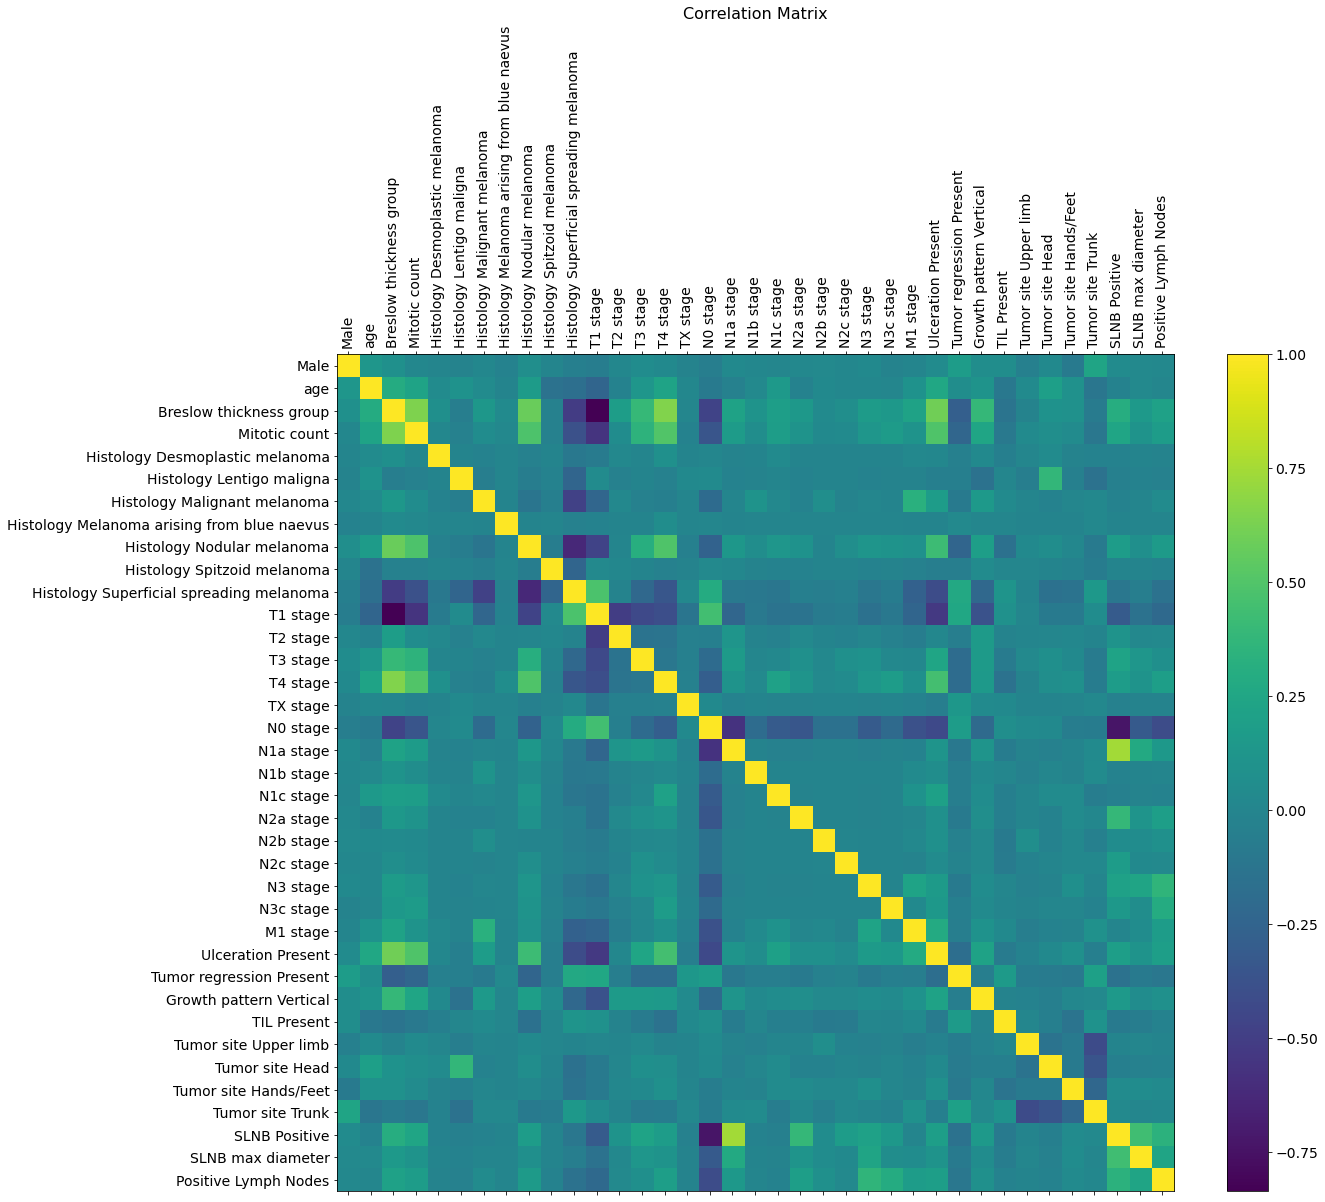

In [57]:
f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=90)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Define two alternative set of features

In [58]:
X.columns

Index(['Male', 'age', 'Breslow thickness group', 'Mitotic count',
       'Histology Desmoplastic melanoma', 'Histology Lentigo maligna',
       'Histology Malignant melanoma',
       'Histology Melanoma arising from blue naevus',
       'Histology Nodular melanoma', 'Histology Spitzoid melanoma',
       'Histology Superficial spreading melanoma', 'T1 stage', 'T2 stage',
       'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage',
       'N1b stage', 'N1c stage', 'N2a stage', 'N2b stage', 'N2c stage',
       'N3 stage', 'N3c stage', 'M1 stage', 'Ulceration Present',
       'Tumor regression Present', 'Growth pattern Vertical', 'TIL Present',
       'Tumor site Upper limb', 'Tumor site Head', 'Tumor site Hands/Feet',
       'Tumor site Trunk', 'SLNB Positive', 'SLNB max diameter',
       'Positive Lymph Nodes'],
      dtype='object')

In [59]:
# drop correlate (validating...)

X1 = X.drop(['Breslow thickness group', 'SLNB Positive', 'SLNB max diameter', 'Positive Lymph Nodes'], 
       axis = 1)

X2 = X.drop(['T1 stage', 'T2 stage', 'T3 stage', 'T4 stage', 'TX stage', 'N0 stage', 'N1a stage', 'N1b stage', 'N1c stage', 'N2a stage', 'N2b stage', 'N2c stage', 'N3 stage', 'N3c stage'], 
       axis = 1)


# Principal Components Analysis

In [60]:
X_scaled = StandardScaler().fit_transform(X) #features should be scaled!!!

## 2 components

In [61]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, mela_cleaned[['DECESSO_3_anni']]], axis = 1)

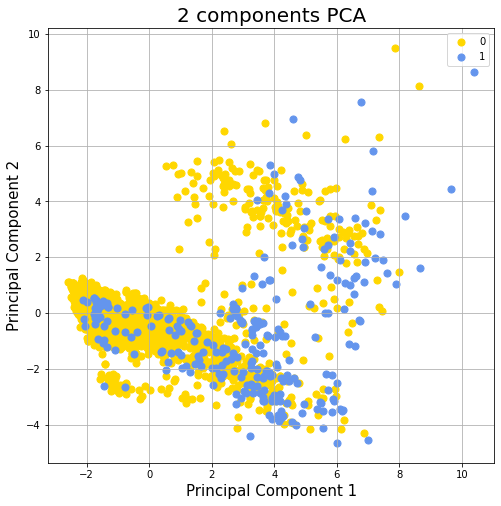

In [62]:
# plot observations 2 pcs

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 components PCA', fontsize = 20)
targets = [0,1]
colors = ['gold', 'cornflowerblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DECESSO_3_anni'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



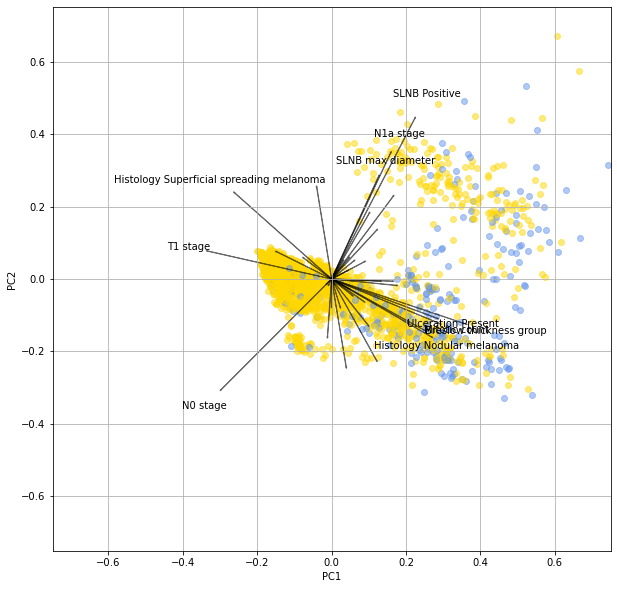

In [103]:
# plot features with higher coeff (in absolute terms) in pc1 and 2

y = mela_cleaned[['DECESSO_3_anni']]

c_map = {0: 'gold', 1: 'cornflowerblue'}
def myplot(score,coeff,labels=None, coeff_tr = 0.05):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for i in range(len(xs)):
        plt.scatter(xs[i] * scalex,ys[i] * scaley, alpha = 0.5, color = c_map[y.values[i,0]])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',alpha = 0.5)
        
        lenght = np.sqrt(coeff[i,0]**2 + coeff[i,1]**2)
        
        if labels is None:
            if lenght>coeff_tr:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            if lenght>coeff_tr:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75)
    plt.ylim(-0.75,0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    


l = list(X.columns)

#Call the function. Use only the 2 PCs.
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),l, 0.30)
plt.show()

## 3 components

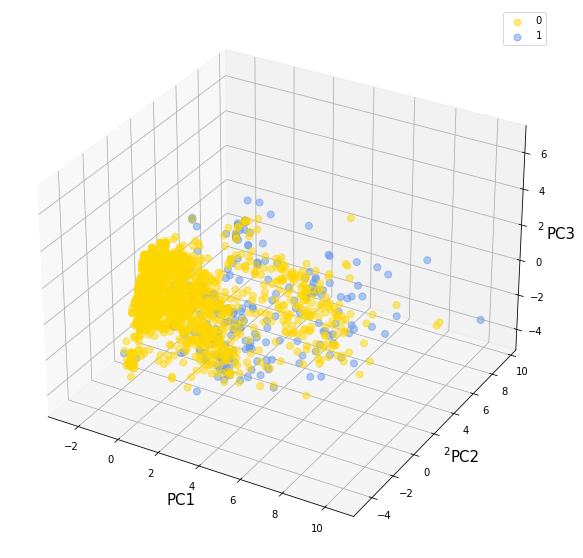

In [105]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


finalDf = pd.concat([principalDf, mela_cleaned[['DECESSO_3_anni']]], axis = 1)


fig = plt.figure()
fig.set_size_inches(10, 10)

ax = plt.axes(projection='3d')
targets = [0,1]
colors = ['gold', 'cornflowerblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['DECESSO_3_anni'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50
               , alpha = 0.5)
ax.legend(targets)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

#ax.set_title('3 components PCA', fontsize = 20)
ax.grid()


In [106]:
pca.explained_variance_ratio_ # <30% :(

array([0.15825628, 0.06533917, 0.05000735])

In [122]:
0.15825628+ 0.06533917

0.22359545

In [123]:
0.15825628+ 0.06533917+ 0.05000735

0.2736028

## Minimum number of components for 80% explained variability

In [107]:
# use n components to have 80% variability explained
pca = PCA(.80)
X3_array = pca.fit_transform(X_scaled)
X3 = pd.DataFrame(X3_array) # as df (required by functions below)

In [108]:
X3.shape #pca.n_components_ 20 components

(2647, 20)

In [109]:
X.shape # compared to 37 original num. of features

(2647, 37)

In [110]:
X1.shape # compared to 33 features in subset 1 (no breslow and lymphnodes info)

(2647, 33)

In [111]:
X2.shape # compared to 23 features in subset 2 (no T, N values)

(2647, 23)

# Models

### Task: Predict Survival/Death in 3 years from diagnosis

## Define target variable and split train and test records

In [112]:
# target/label
y = mela_cleaned['DECESSO_3_anni']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X1, #X1, X2, X3
                                                    y, 
                                                    test_size=0.10, random_state=42)

In [113]:
mela_cleaned['DECESSO_3_anni'].value_counts()

0    2372
1     275
Name: DECESSO_3_anni, dtype: int64

In [114]:
X_train.shape

(2382, 33)

In [194]:
X_test.shape

(265, 33)

## Define utils functions for sklearn classifiers

In [118]:
def print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, name):

    # perform cross validation
    cv = 5 #10
    
    gs = GridSearchCV(clf, parameters, 
                       scoring = ('balanced_accuracy', 'accuracy','f1', 'precision', 'recall'), # measures to evaluate
                       refit = 'balanced_accuracy', # measure with which decide best params
                       cv = cv) # n fold in statified CV
    
    gs.fit(X_train, y_train) # fit gridsearch
    
    index_best = gs.cv_results_['params'].index(gs.best_params_) # position of best params

    # mean scores in cv with best params

    gs.cv_results_['mean_test_balanced_accuracy'][index_best]
    gs.cv_results_['std_test_balanced_accuracy'][index_best]
    gs.cv_results_['mean_test_accuracy'][index_best]
    gs.cv_results_['std_test_accuracy'][index_best]
    gs.cv_results_['mean_test_f1'][index_best]
    gs.cv_results_['std_test_f1'][index_best]
    gs.cv_results_['mean_test_precision'][index_best]
    gs.cv_results_['std_test_precision'][index_best]
    gs.cv_results_['mean_test_recall'][index_best]
    gs.cv_results_['std_test_recall'][index_best]
    
    print('-------- CV MEAN SCORES (k = '+str(cv)+') ' + name + ' --------')
    print("%0.3f accuracy with a standard deviation of %0.3f" % (gs.cv_results_['mean_test_balanced_accuracy'][index_best], gs.cv_results_['std_test_balanced_accuracy'][index_best]))
    print("%0.3f balanced accuracy with a standard deviation of %0.3f" % (gs.cv_results_['mean_test_balanced_accuracy'][index_best], gs.cv_results_['std_test_balanced_accuracy'][index_best]))  
    print("%0.3f precision with a standard deviation of %0.3f" % (gs.cv_results_['mean_test_precision'][index_best], gs.cv_results_['std_test_precision'][index_best]))
    print("%0.3f recall with a standard deviation of %0.3f" % (gs.cv_results_['mean_test_recall'][index_best],gs.cv_results_['std_test_recall'][index_best]))
    print("%0.3f f1 score with a standard deviation of %0.3f" % (gs.cv_results_['mean_test_f1'][index_best],gs.cv_results_['std_test_f1'][index_best]))
    
    return(gs.best_params_)

def clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test):

    # final fit and testing
    clf = clf.fit(X_train, y_train)

    # test model 
    print('-------------------- TRAIN SCORES -------------------')
    predictions = clf.predict(X_train)
    #print(classification_report(predictions, y_train))
    print("%0.3f accuracy" % (accuracy_score(predictions, y_train)))
    print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_train)))  
    print("%0.3f precision" % (precision_score(predictions, y_train)))
    print("%0.3f recall" % (recall_score(predictions, y_train)))
    print("%0.3f f1 score" % (f1_score(predictions, y_train)))



    print('-------------------- TEST SCORES ---------------------')
    predictions = clf.predict(X_test)
    #print(classification_report(predictions, y_test))
    print("%0.3f accuracy" % (accuracy_score(predictions, y_test)))
    print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_test)))  
    print("%0.3f precision" % (precision_score(predictions, y_test)))
    print("%0.3f recall" % (recall_score(predictions, y_test)))
    print("%0.3f f1 score" % (f1_score(predictions, y_test)))

    return clf
 

## Logistic Regression

Good baseline

In [196]:
# gridsearch cross validation for hyperparameter tuning

parameters = {'max_iter':(300, 1000), 'C':[10e30, 10e5]}
clf = LogisticRegression(random_state=0, class_weight = 'balanced')

best_params = print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, 'LR')
print(best_params)

C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

-------- CV MEAN SCORES (k = 5) LR --------
0.828 accuracy with a standard deviation of 0.049
0.828 balanced accuracy with a standard deviation of 0.049
0.390 precision with a standard deviation of 0.029
0.800 recall with a standard deviation of 0.106
0.523 f1 score with a standard deviation of 0.046
{'C': 1e+31, 'max_iter': 300}


C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
# define clf with best params

clf = LogisticRegression(random_state=0, class_weight = 'balanced', **best_params).fit(X_train, y_train)


C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [198]:
# final fit and evaluate model
clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.860 accuracy
0.694 balanced
0.829 precision
0.410 recall
0.549 f1 score
-------------------- TEST SCORES ---------------------
0.891 accuracy
0.742 balanced
0.800 precision
0.511 recall
0.623 f1 score


C:\Users\39346\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Plot summary

In [199]:
# define a function to plot regression summary output (similar to R lm)
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [200]:
def print_coef_p_val(model, x):
    print("                                       Name      Coeff     Exp(Coeff)   p-val   signif")

    for n,c,p in zip(['intercept']+list(x.columns), [model.intercept_[0]] + list(model.coef_[0]), logit_pvalue(model, x)):
        s = ''
        if p<0.0001: s = '***'
        elif p<0.001: s = '**'
        elif p<0.05: s = '*'
        elif p<0.1: s = '.'
        print("%45s   %3.3f      %3.3f    %10.3E  %s" %(n,c,np.exp(c),p,s))


In [201]:
print_coef_p_val(clf, X_train)

                                       Name      Coeff     Exp(Coeff)   p-val   signif
                                    intercept   -5.030      0.007     5.513E-07  ***
                                         Male   0.562      1.754     8.149E-05  ***
                                          age   0.096      1.101     0.000E+00  ***
                                Mitotic count   0.011      1.011     4.850E-01  
              Histology Desmoplastic melanoma   -1.810      0.164     8.945E-02  .
                    Histology Lentigo maligna   -0.054      0.948     9.368E-01  
                 Histology Malignant melanoma   -0.284      0.752     6.432E-01  
  Histology Melanoma arising from blue naevus   -0.272      0.762     9.159E-01  
                   Histology Nodular melanoma   0.333      1.395     5.686E-01  
                  Histology Spitzoid melanoma   0.698      2.010     3.815E-01  
     Histology Superficial spreading melanoma   0.398      1.489     4.713E-01  
       

## SVM

Hyperparameters to tune
* kernel
* degree (se polynomial kernel)
* gamma

In [202]:
# gridsearch cross validation for hyperparameter tuning

parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'), 
              'degree' : [1,2], 
              'gamma' : ('scale', 'auto'), 
              'max_iter' :  [-1, 500]} 


clf = SVC(class_weight = 'balanced', random_state = 0)


best_params = print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, 'SVM')
print(best_params)


C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control th

C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\39346\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

-------- CV MEAN SCORES (k = 5) SVM --------
0.831 accuracy with a standard deviation of 0.043
0.831 balanced accuracy with a standard deviation of 0.043
0.380 precision with a standard deviation of 0.020
0.812 recall with a standard deviation of 0.093
0.517 f1 score with a standard deviation of 0.038
{'degree': 1, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1}


In [203]:
# define clf with best params

clf = SVC(class_weight = 'balanced', random_state = 0, **best_params ).fit(X_train, y_train)

In [204]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.854 accuracy
0.687 balanced
0.812 precision
0.398 recall
0.534 f1 score
-------------------- TEST SCORES ---------------------
0.894 accuracy
0.746 balanced
0.767 precision
0.523 recall
0.622 f1 score


## Gradient Boosting

Hyperparameters to tune

* n_estimators
* min_samples_split
* min_samples_leaf
* max_depth

In [205]:
# gridsearch cross validation for hyperparameter tuning

parameters = {'n_estimators' : (45,100,120), #100
'max_depth' : (3,4,7), #4
'min_samples_split' : (2,3), #2
'min_samples_leaf' : (1,2), #1
'max_features' : ('log2', None)} #log


clf = GradientBoostingClassifier(random_state = 0)


best_params = print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, 'GB')
print(best_params)



-------- CV MEAN SCORES (k = 5) GB --------
0.713 accuracy with a standard deviation of 0.033
0.713 balanced accuracy with a standard deviation of 0.033
0.621 precision with a standard deviation of 0.060
0.457 recall with a standard deviation of 0.064
0.526 f1 score with a standard deviation of 0.061
{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [206]:
# define clf with best params

clf = GradientBoostingClassifier(random_state = 0, **best_params ).fit(X_train, y_train)

In [207]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.950 accuracy
0.908 balanced
0.616 precision
0.858 recall
0.717 f1 score
-------------------- TEST SCORES ---------------------
0.913 accuracy
0.817 balanced
0.400 precision
0.706 recall
0.511 f1 score


#### Features Importance plot

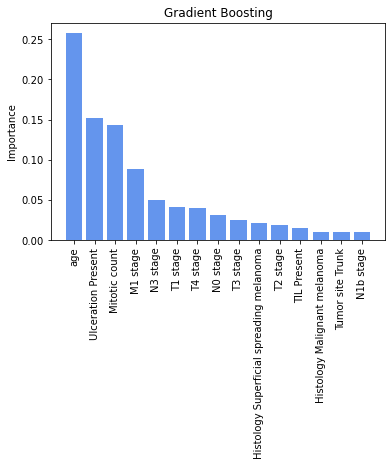

,feature,importance
1,age,0.257519
25,Ulceration Present,0.152521
2,Mitotic count,0.143595
24,M1 stage,0.088868
22,N3 stage,0.049592
10,T1 stage,0.041186
13,T4 stage,0.040636
15,N0 stage,0.031718
12,T3 stage,0.024645
9,Histology Superficial spreading melanoma,0.021611


In [208]:
clf = clf
X_plot = X_train
c = 'cornflowerblue' # 'orange' 'cornflowerblue'

# get importance
importance = clf.feature_importances_
df_importance = pd.DataFrame(X_plot.columns,  columns = ['feature'])
df_importance['importance'] = importance

# sorty by importance
df_importance = df_importance.sort_values(by = 'importance', ascending = False)
df_importance = df_importance[df_importance.importance > 0]

# plot 15 most important features nonn zero
plt.bar(df_importance.feature[:15], df_importance.importance[:15] , color = c)
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Gradient Boosting')
plt.show()

df_importance

## Random Forest

Hyperparameters to tune

* n_estimators
* min_samples_split
* min_samples_leaf
* max_depth

In [209]:
# gridsearch cross validation for hyperparameter tuning

parameters = {'n_estimators' : (30,45,100), #45
'max_depth' : (5,7,9), #7
'min_samples_split' : (3,4), #4
'min_samples_leaf' : (1,2), #2
'max_features' : ('log2', None)} #log2


clf = RandomForestClassifier(random_state=0)


best_params = print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, 'RF')
print(best_params)



-------- CV MEAN SCORES (k = 5) RF --------
0.713 accuracy with a standard deviation of 0.016
0.713 balanced accuracy with a standard deviation of 0.016
0.635 precision with a standard deviation of 0.055
0.457 recall with a standard deviation of 0.028
0.531 f1 score with a standard deviation of 0.036
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [210]:
# define clf with best params

clf = RandomForestClassifier(random_state=0, **best_params ).fit(X_train, y_train)


In [211]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.957 accuracy
0.939 balanced
0.637 precision
0.918 recall
0.752 f1 score
-------------------- TEST SCORES ---------------------
0.928 accuracy
0.880 balanced
0.467 precision
0.824 recall
0.596 f1 score


In [212]:
# save model

from joblib import dump, load
dump(clf, 'RF_model.joblib')

clf = load('RF_model.joblib')

clf.predict_proba(X_test)

predictions = clf.predict(X_test)

In [213]:
print("%0.3f accuracy" % (accuracy_score(predictions, y_test)))
print("%0.3f balanced" % (balanced_accuracy_score(predictions, y_test)))  
print("%0.3f precision" % (precision_score(predictions, y_test)))
print("%0.3f recall" % (recall_score(predictions, y_test)))
print("%0.3f f1 score" % (f1_score(predictions, y_test)))

0.928 accuracy
0.880 balanced
0.467 precision
0.824 recall
0.596 f1 score


#### Features Importance plot

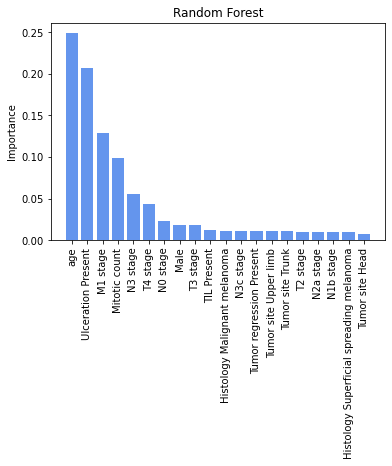

,feature,importance
1,age,0.248811
25,Ulceration Present,0.207283
24,M1 stage,0.129440
2,Mitotic count,0.098951
22,N3 stage,0.055749
13,T4 stage,0.043614
15,N0 stage,0.022645
0,Male,0.018271
12,T3 stage,0.018141
28,TIL Present,0.011905


In [214]:
#plt.figure(figsize=(10, 6), dpi=80)

clf = clf
X_plot = X_train
c = 'cornflowerblue' # 'orange' 'cornflowerblue'

# get importance
importance = clf.feature_importances_
df_importance = pd.DataFrame(X_plot.columns,  columns = ['feature'])
df_importance['importance'] = importance

# sorty by importance
df_importance = df_importance.sort_values(by = 'importance', ascending = False)
df_importance = df_importance[df_importance.importance > 0]

# plot 15 most important features nonn zero
plt.bar(df_importance.feature[:20], df_importance.importance[:20], color = c)
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Random Forest')

plt.show()

df_importance

#### ROC curve and AUC

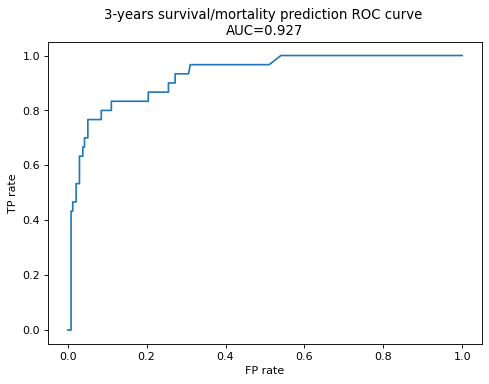

In [215]:
plt.figure(figsize=(7, 5), dpi=80)

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

'''y_pred_proba = clf.predict_proba(X_test)[::,0]
fpr, tpr, _ = roc_curve(1*(y_test == 0),  y_pred_proba)
auc = roc_auc_score(1*(y_test == 0), y_pred_proba)'''

plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.title("3-years survival/mortality prediction ROC curve \nAUC="+str(round(auc, 3)))
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.show()

## kNN


In [119]:
# gridsearch cross validation for hyperparameter tuning

parameters = {'n_neighbors' : (3,4,5,6,7,8,9), 
              'weights' : ('uniform', 'distance')} 


clf = KNeighborsClassifier()


best_params = print_clf_gridsearchcv_scores(clf, parameters, X_train, y_train, 'KNN')
print(best_params)


-------- CV MEAN SCORES (k = 5) KNN --------
0.649 accuracy with a standard deviation of 0.031
0.649 balanced accuracy with a standard deviation of 0.031
0.469 precision with a standard deviation of 0.065
0.343 recall with a standard deviation of 0.060
0.395 f1 score with a standard deviation of 0.060
{'n_neighbors': 3, 'weights': 'distance'}


In [120]:
# define clf with best params

clf = KNeighborsClassifier(**best_params ).fit(X_train, y_train)

In [121]:
# final fit and evaluate model

clf = clf_fit_print_test_scores(clf, X_train, y_train, X_test, y_test)

-------------------- TRAIN SCORES -------------------
0.995 accuracy
0.992 balanced
0.963 precision
0.987 recall
0.975 f1 score
-------------------- TEST SCORES ---------------------
0.902 accuracy
0.780 balanced
0.300 precision
0.643 recall
0.409 f1 score


## Define utils functions for keras models

In [ ]:
# utils functions for test/validation phase

def print_dnn_cv_scores(model, X_train, y_train, name, num_epochs, batch):

    # define folds

    cv_folds = 5 # 10
    kf = StratifiedKFold(n_splits = cv_folds, random_state = 42, shuffle = True) 
    fold_var = 1

    # prepare structure to save results for every fold
    VALIDATION_LOSS = []
    VALIDATION_ACCURACY = []
    VALIDATION_RECALL = []
    VALIDATION_PRECISION = []
    VALIDATION_BALANCED_ACCURACY = []
    history_save_loss = np.zeros(num_epochs)
    history_save_val_loss = np.zeros(num_epochs)
    history_save_acc = np.zeros(num_epochs)
    history_save_val_acc = np.zeros(num_epochs)

    # cycle model fitting and evaluation on folds
    for train_index, val_index in kf.split(np.zeros(X_train.shape[0]),y_train):

        # split data according to fold
        training_data = X_train.iloc[train_index]
        validation_data = X_train.iloc[val_index]
        training_label = y_train.iloc[train_index]
        validation_label = y_train.iloc[val_index]

        # compile model defining loss, optimizer and metrics
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "Precision","Recall"]) 

        # reshape input as tensors
        training_data = training_data.to_numpy()
        validation_data = validation_data.to_numpy()

        training_data = training_data.reshape(training_data.shape[0], training_data.shape[1], 1)
        validation_data = validation_data.reshape(validation_data.shape[0], validation_data.shape[1], 1)

        # fit the model
        history = model.fit(training_data, training_label,
                epochs=num_epochs, batch_size=batch,
                validation_data=(validation_data, validation_label),
                verbose = 0)

        # evaluate the model
        results = model.evaluate(validation_data, validation_label, verbose = 0)
        results = dict(zip(model.metrics_names,results))

        # save results
        VALIDATION_LOSS.append(results['loss'])
        VALIDATION_ACCURACY.append(results['accuracy'])
        VALIDATION_RECALL.append(results['recall'])
        VALIDATION_PRECISION.append(results['precision'])

        history_save_loss += np.array(history.history['loss'])
        history_save_val_loss += np.array(history.history['val_loss'])
        history_save_acc += np.array(history.history['accuracy'])
        history_save_val_acc += np.array(history.history['val_accuracy'])

        predictions = (model.predict(validation_data) > 0.5).astype("int32")   # recall that the output layer activation is sigmoid
        VALIDATION_BALANCED_ACCURACY.append(balanced_accuracy_score(predictions, validation_label))

        tf.keras.backend.clear_session() # avoid memory consumption over time when creating many models in a loop

        fold_var += 1

    # compute mean results and print
    VALIDATION_LOSS = np.array(VALIDATION_LOSS)
    VALIDATION_ACCURACY = np.array(VALIDATION_ACCURACY)
    VALIDATION_RECALL = np.array(VALIDATION_RECALL)
    VALIDATION_PRECISION = np.array(VALIDATION_PRECISION)
    VALIDATION_F1 = 2*(VALIDATION_PRECISION*VALIDATION_RECALL)/(VALIDATION_PRECISION+VALIDATION_RECALL)
    VALIDATION_BALANCED_ACCURACY = np.array(VALIDATION_BALANCED_ACCURACY)

    print('-------- CV MEAN SCORES (k = '+str(cv_folds) +') ' + name + ' --------')
    print("%0.3f loss with a standard deviation of %0.3f" % (VALIDATION_LOSS.mean(), VALIDATION_LOSS.std()))
    print("%0.3f accuracy with a standard deviation of %0.3f" % (VALIDATION_ACCURACY.mean(), VALIDATION_ACCURACY.std()))
    print("%0.3f precision with a standard deviation of %0.3f" % (VALIDATION_PRECISION.mean(), VALIDATION_PRECISION.std()))
    print("%0.3f recall with a standard deviation of %0.3f" % (VALIDATION_RECALL.mean(), VALIDATION_RECALL.std()))
    print("%0.3f f1 score with a standard deviation of %0.3f" % (VALIDATION_F1.mean(),VALIDATION_F1.std()))
    print("%0.3f balanced accuracy score with a standard deviation of %0.3f" % (VALIDATION_BALANCED_ACCURACY.mean(),VALIDATION_BALANCED_ACCURACY.std()))

    return (history.epoch, history_save_loss/cv_folds, history_save_val_loss/cv_folds, history_save_acc/cv_folds, history_save_val_acc/cv_folds)


In [ ]:
def dnn_cv_mean_learning_curves_plot(history):

    # print loss
    epochs, loss, val_loss, acc, val_acc =  history 
    plt.figure(figsize=(10,6))
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Mean Loss')
    plt.legend(['train', 'validation'])
    plt.xlabel('epochs')
    plt.show()

    # print accuracy
    plt.figure(figsize=(10,6))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Mean Accuracy') 
    plt.legend(['train', 'validation'])
    plt.xlabel('epochs')
    plt.show()

In [ ]:
# utils functions for evaluation phase

def dnn_fit_learning_curves_plot(model, X_train, y_train, X_test, y_test, num_epochs, batch):

    # reshape input as tensors
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # re compile and fit model on all training data
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch, validation_data=(X_test, y_test), verbose=0)

    # plot loss and accuracy learning curves
    plt.figure(figsize=(10,6))
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'validation'])
    plt.xlabel('epochs')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.epoch, history.history['accuracy'])
    plt.plot(history.epoch, history.history['val_accuracy'])
    plt.title('Accuracy') 
    plt.legend(['train', 'validation'])
    plt.xlabel('epochs')
    plt.show() 

    return model


In [ ]:
def dnn_print_test_scores(model, X_train, y_train, X_test, y_test):

    # reshape input as tensors
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # test model 
    print('-------------------- TRAIN SCORES -------------------')
    predictions = (model.predict(X_train) > 0.5).astype("int32")  # recall that the output layer activation is sigmoid
    print(classification_report(predictions, y_train))
    print('balanced accuracy ', balanced_accuracy_score(predictions, y_train))

    print('-------------------- TEST SCORES ---------------------')
    predictions = (model.predict(X_test) > 0.5).astype("int32")   # recall that the output layer activation is sigmoid
    print(classification_report(predictions, y_test))
    print('balanced accuracy ', balanced_accuracy_score(predictions, y_test))

## Deep Neural Network

#### Define model
* first layer input (size = num features)
* 2 dense hidden layers (ReLU activation)
* last layer activation="sigmoid" and loss="binary_crossentropy" since binary classification task

In [ ]:
# define Dense Neural Network model

def create_dnn(num_features, dense_units = 16, reg_term = 0.01):
    # layers
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape = (num_features)))
    model.add(keras.layers.Dense(dense_units, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(reg_term)))
    model.add(keras.layers.Dense(dense_units/2, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(reg_term)))
    #model.add(keras.layers.Dense(dense_units/4, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(reg_term)))
    model.add(keras.layers.Dense(1, activation="sigmoid")) # output layer for binary classification

    return model

#### Train/Validate

In [ ]:
# set model hyperparameters (only manually test some combinations with CV to avoid long computation time)

dense_units_s = 16 #16, 8, 32     # number of units for the dense layers
num_epochs_s = 100 #50, 100 #300, 250   # number of training epochs
reg_term_s = 0.001 #0.01       # regularization factor
batch_s = 256 #128             # batch size

In [ ]:
DNNs = create_dnn(num_features = X_train.shape[1], dense_units = dense_units_s, reg_term = reg_term_s)
h = print_dnn_cv_scores(DNNs, X_train, y_train, 'DNN', num_epochs = num_epochs_s, batch = batch_s)

In [ ]:
# plot learning curves
dnn_cv_mean_learning_curves_plot(h)

#### Evaluate

In [ ]:
# fit and save model

DNNs = create_dnn(num_features = X_train.shape[1], dense_units = dense_units_s, reg_term = reg_term_s)
DNNs_fit = dnn_fit_learning_curves_plot(DNNs, X_train, y_train, X_test, y_test, num_epochs = 100, batch = batch_s)
DNNs_fit.save("DNNs trained.h5")


In [ ]:
# load and evaluate model
DNNs_fit = keras.models.load_model(mainPath+'DNNs trained_new.h5')
dnn_print_test_scores(DNNs_fit, X_train, y_train, X_test, y_test)

#### ROC curve and AUC

In [ ]:
# plot roc curve and AUC

plt.figure(figsize=(7, 5), dpi=80)

y_pred_proba = DNNs_fit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)



plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.title("3-years survival/mortality prediction ROC curve \nAUC="+str(round(auc, 3)))
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.show()